<a href="https://colab.research.google.com/github/ShawnScience/Project_Genesis_AI/blob/main/Genesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

moment-big-bang-theory-3d-conceptual-art-spectacular-abstract-background_87538-3183.avif

In the beginning there was a BANG! And then later I made this code. Anyway, lets get started with TensorFlow!

In [ ]:
import tensorflow as tf

a = tf.constant([2], name = 'constant_a')
a
b = tf.constant([3], name = 'constant_b')

What we did here is import the tensorflow library and gave it the symbolic name tf. Now we create a variable a and create a 1D tensor with the value of 2 in it and an operation name 'constant_a' which I guess we can use to do some matrix stuff. No! Not like the movie! More like dot products, transforms etc. Ok simply putting a executed and shows us all this info I just said and the data type of int at 2^32 bits max signed I guess.

In [ ]:
tf.print(a)

[2]


Went away and came back and tried to run this section of code. Failed. Looks like the import above only counts if we run that section. Which means the logical flow of this program should be done sequentially. Good to know. Ok, first we print a and see its an array initialized with value 2 as we know, just experimenting here. Ok cool. Lets add more detail.

In [ ]:
tf.print(a.numpy())

array([2], dtype=int32)


now we see its an array of data type int 32 bit. Nice. Numpy converted the tensor into an array that we can now access and print. Ok a bit more.

In [ ]:
tf.print(a.numpy()[0])

2


ok so we use the tf print function, convert a into a numpy array, I guess we do that because now we can use numpys math library to do some cool math stuff. And we access the first element of the array [0] which is 2. Easy as blueberry pie.

In [ ]:
@tf.function
def add(a,b):
    c = tf.add(a, b)
    #c = a + b is also a way to define the sum of the terms
    print(c)
    return c


@tf.function is a decorator. Bascially it acts as a wrapper function that does something first, in this case it modies the way this python code will execute from the standard to the tensorflow graph execution. This optimizes the matrix operations so that they are faster than they would normally be! It's like an upgrade to your cars engine. Now you can go back to the Future at 88mph!!

In [ ]:
result = add(a,b)
tf.print(result[0])

Tensor("Add:0", shape=(1,), dtype=int32)
5


Since we defined a as 2 and b as 3 that looks fine. This used a simple 0 point arrays and add them together but we used the basics of tensor flow. What about 1D? That's an array defined like [1, 2, 3, ..] 2D? Array defined as [ [1, 2], [3, 4], ... ] bascially nested list. 3D? Now this is called a TRUE TENSOR and its like [ [[1, 2], [3, 4]], [[5, 6], [7, 8]], ... ] basically taking 2d and nesting it. But talking is for campaigns, now is a time for ACTION:

In [ ]:
ZeroD = tf.constant(2)
OneD = tf.constant([3,4,5])
TwoD = tf.constant([ [6,7,8], [9,10,11], [12,13,14] ])
TwoD2 = tf.constant([ [62,37,68], [99,140,121], [142,173,174] ])
Tensor = tf.constant([ [[15,16,17], [18,19,20]], [[21,22,23], [24,25,26]] ])
Tensor2 = tf.constant([ [[115,116,117], [118,119,210]], [[211,212,213], [214,215,216]] ])


ok now lets do some mathematical operations on them.

In [ ]:
@tf.function
def mult(m1, m2):
  mmult = tf.matmul(m1, m2)
  return mmult

mult2 = mult(TwoD, TwoD2)

print(mult2)

tf.Tensor(
[[2201 2586 2647]
 [3110 3636 3736]
 [4019 4686 4825]], shape=(3, 3), dtype=int32)


Matrix multiplication complex, looks ok. Alright but how do we use matrixs of numbers to do cool stuff like computer vision or NLP? Well we do some encoding. We turn the aspects of the decision into mathematical number representations. Don't worry some smarty pants out there made some premade encoders so we don't have to. Now lets start looking at ranks and shapes

In [ ]:
@tf.function
def rank_n_shape(x):
  r = tf.rank(x)
  s = tf.shape(x)
  return r, s

H = tf.fill([3, 5, 6], 0)
Hrank, Hshape = rank_n_shape(H)
print("Rank of H is: ", Hrank)
print("Shape of H is: ", Hshape)


Rank of H is:  tf.Tensor(3, shape=(), dtype=int32)
Shape of H is:  tf.Tensor([3 5 6], shape=(3,), dtype=int32)


In [ ]:
@tf.function
def up_n_away(a):
  a = tf.add(a, 2)
  return a

v = tf.Variable(3)
c = tf.constant(12)
for i in range(3):
    c = up_n_away(c)
    v = up_n_away(v)
    print(v)
    print(c)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)


Both increment but only the variable comes with a tf.Operation. We need these to do dynamic computations through the layers.

Anywhoooo now lets do some Natural Language Processing.

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer


dialogue = [ "I am an adventurer",
            "I am a warrior",
             "I am a wizard",
             "I am a Monk",
             "I am an elemental"]

OK now we can use a Tokenizer

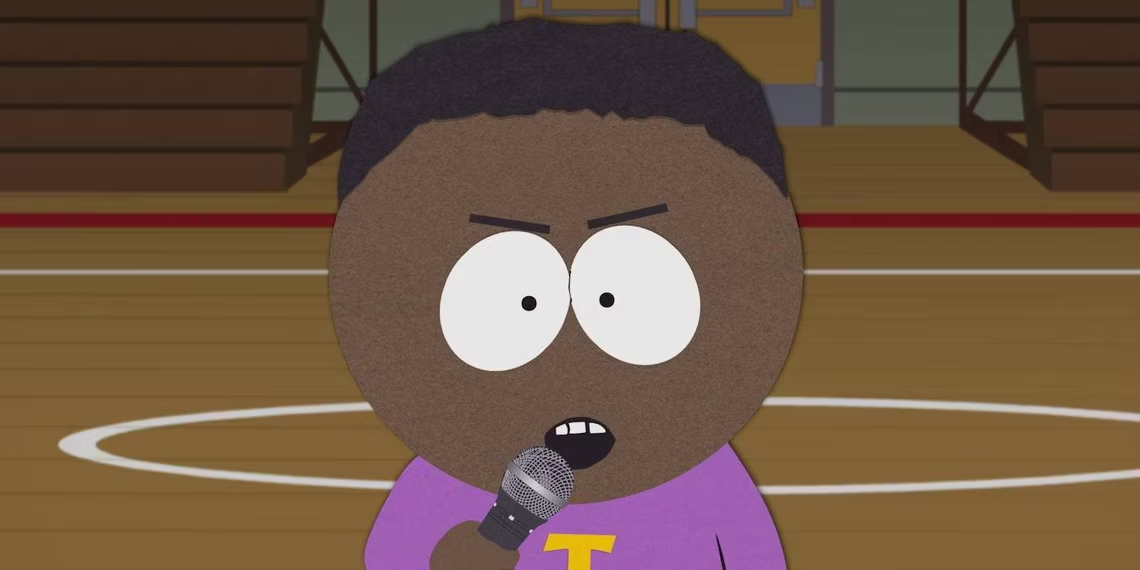

NO! That's TOLKIEN! A Tokenizer is like what we all have used in coding like the tokenizer to split a sentence using space as a delimiter etc. It basically turns each meaningful linguistic bit into a token or numerical value. Like "this very sentence!" could be wordwise tokenized into 4 tokens: this, very, sentence and !. You give them values based on their importance for the task. Like we did above with sequences. Ok now lets do it.

In [ ]:
TK = Tokenizer(num_words= 100)
TK.fit_on_texts(dialogue)
WI = TK.word_index
print(WI)

{'i': 1, 'am': 2, 'a': 3, 'an': 4, 'adventurer': 5, 'warrior': 6, 'wizard': 7, 'monk': 8, 'elemental': 9}


Beep blop, now the sentences have some number representations so a computer can understand it. Now lets turn those into sequences.

In [ ]:
SEQ = TK.texts_to_sequences(dialogue) #sequence = tokenizer turns the texts to sequences for us from the dialogue strong list above
print(SEQ)

[[1, 2, 4, 5], [1, 2, 3, 6], [1, 2, 3, 7], [1, 2, 3, 8], [1, 2, 4, 9]]


In [ ]:
test_dialogue = ["I used to be an adventurer like you",
                 "I am a warrior Monk",
                 "I am exhausted with life",
                 "I was attacked by a fire elemental!"]
test_seq = TK.texts_to_sequences(test_dialogue)
print(WI)
print(test_seq)

{'i': 1, 'am': 2, 'a': 3, 'an': 4, 'adventurer': 5, 'warrior': 6, 'wizard': 7, 'monk': 8, 'elemental': 9}
[[1, 4, 5], [1, 2, 3, 6, 8], [1, 2], [1, 3, 9]]


In [ ]:
TK = Tokenizer(num_words = 100, oov_token = "<idk>")
TK.fit_on_texts(dialogue)
WI = TK.word_index
print(TK)
print(WI)
test_seq = TK.texts_to_sequences(test_dialogue)
print(test_dialogue)
print(test_seq)

{'<idk>': 1, 'i': 2, 'am': 3, 'a': 4, 'an': 5, 'adventurer': 6, 'warrior': 7, 'wizard': 8, 'monk': 9, 'elemental': 10}
['I used to be an adventurer like you', 'I am a warrior Monk', 'I am exhausted with life', 'I was attacked by a fire elemental!']
[[2, 1, 1, 1, 5, 6, 1, 1], [2, 3, 4, 7, 9], [2, 3, 1, 1, 1], [2, 1, 1, 1, 4, 1, 10]]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
paddings = pad_sequences(test_seq, padding = 'pre', truncating = 'pre', maxlen=7)
print(paddings)

[[ 1  1  1  5  6  1  1]
 [ 0  0  2  3  4  7  9]
 [ 0  0  2  3  1  1  1]
 [ 2  1  1  1  4  1 10]]


So I want to do some sentiment analysis and other NLP stuff. One dataset for this is the Standford Sentiment Treebank set. First we need the files object to import stuff into colab for us to use. THIS IS NOT PERSISTENT! So we have to do this every session.

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving SST.zip to SST (4).zip


To use the Standford dataset we must do a

mandatory citation:

Recursive Deep Models for Semantic Compositionality Over a Sentiment Treebank
Richard Socher, Alex Perelygin, Jean Wu, Jason Chuang, Christopher Manning, Andrew Ng and Christopher Potts
Conference on Empirical Methods in Natural Language Processing (EMNLP 2013)

In [ ]:
import zipfile

dictn = {}

with zipfile.ZipFile("SST.zip", 'r') as zip_ref:
    file_info = zip_ref.getinfo('stanfordSentimentTreebank/dictionary.txt')
    zip_ref.extract(file_info, './')
    with open("stanfordSentimentTreebank/dictionary.txt", 'r') as dic:
      for line in dic:
        p, p_id = line.strip().split('|')
        dictn[p_id.strip()] = p.strip()

count = 0
for p_id, p in dictn.items():
    print(f"Phrase ID: {p_id}, Phrase: {p}")
    count += 1
    if count >= 10:
        break


Phrase ID: 0, Phrase: !
Phrase ID: 22935, Phrase: ! '
Phrase ID: 18235, Phrase: ! ''
Phrase ID: 179257, Phrase: ! Alas
Phrase ID: 22936, Phrase: ! Brilliant
Phrase ID: 40532, Phrase: ! Brilliant !
Phrase ID: 22937, Phrase: ! Brilliant ! '
Phrase ID: 60624, Phrase: ! C'mon
Phrase ID: 13402, Phrase: ! Gollum 's ` performance ' is incredible
Phrase ID: 179258, Phrase: ! Oh , look at that clever angle ! Wow , a jump cut !


Ok so we parsed out the phrase IDs and their corresponding phrases from the data. Ok so now I need to split the data into a training set and then a test set to train and then see if the training went well respectively.Then I'll use a models tokenizer and train that model. Which model? I did a little bit of research and think I'll go with BERT, from google as I discovered stumbling around on huggingface.co a website dedicated to pretrained models for all sorts of task! Anyway Bert it is, since its so popular now. So lets do all of this next.

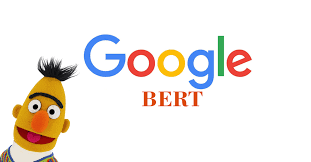

BERT lives on Seaseme street, but thats somehow inside the transformers module. So we need to install that here.

In [ ]:
!pip install transformers

In [ ]:
from sklearn.model_selection import train_test_split as ttsplit

p_id = list(dictn.keys())
p = list(dictn.values())

train_ids, test_ids, train_ph, test_ph = ttsplit(p_id, p, test_size=0.1, random_state=42)
#so right there we used the import to split the data into training and test sets usingg
#the variables from before. We seed the random state with 42, the key to the universe
#that way the data is always shuffled the same way for consistent results everytime we play here!

from transformers import TFAutoModel, AutoTokenizer
#Now load the Model
model = TFAutoModel.from_pretrained("bert-base-uncased")
#Load the tokenizer in
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

#(Sits back in Star Trek Captains chair) ... Encode
h = len(p)//50
encoded = tokenizer(p[:h], padding=True, truncation=True, max_length=200, return_tensors="tf")
#now the output
out = model(**encoded)

NameError: ignored